<a href="https://colab.research.google.com/github/nsubbaian/BayesianML/blob/master/Project5/BayesMLProject5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5 - Expectation Maximization

Implement EM on a Gaussian mixture model in 1 and 2 dimensions with K= 3. The choice of means, covariance and pi is up to you. The algorithm is laid out explicitly in equations 9.23-9.28.

Helpful resources:
https://www.youtube.com/watch?v=REypj2sy_5U

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings

## 1-D Case

For the 1-d case, produce a plot that shows a histogram of your generated observations, and overlay on that histogram the pdf you found. Plot this at algorithm init, and a couple other times as the algorithm converges. If you feel ambitious make a movie. If you want to see the algorithm break, artificially introduce a data point that exactly equals one of the means of the distribution.

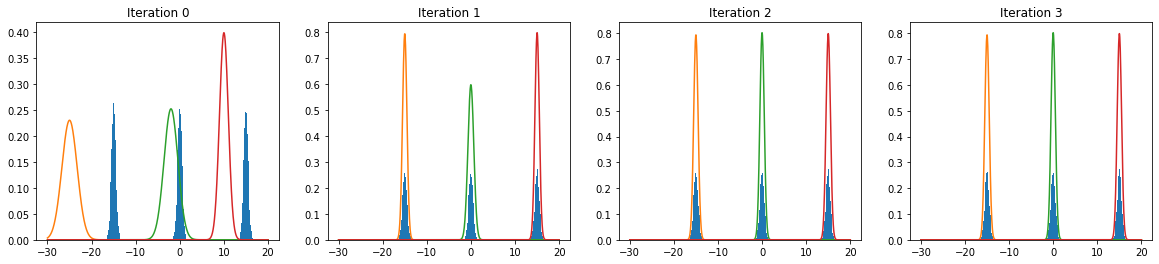

In [2]:
# -------------Generate Data
mu = [-15, 0, 15]
sigma = [.5, .5, .5]
data = []
for i in range(3):
  data.extend(np.random.normal(mu[i], sigma[i], 10000))
data = np.array(data)
N = len(data)

# ---------- Initialize Means, Covariances, pi
muk = [-25, -2, 10]
covk = [3,2.5, 1]
pi = [.3, .2, .5]

# ---------- Implement EM
x = np.linspace(-30, 20, 1000)
fig = plt.figure(figsize=[20,4])

for i in range(4):
  axs = plt.subplot(1, 4, i+1)
  axs.hist(data, 200, density=True)

  if i > 0:
    # EQ 9.23
    g_num = np.array([pi[i]*(norm(muk[i], covk[i]).pdf(data)) for i in range(3)])
    g = g_num/np.sum(g_num, axis=0)

    # EQ 9.27
    Nk = np.array([np.sum(g[i])for i in range(3)])

    # EQ 9.24
    muk = np.array([np.sum(data*g[i])for i in range(3)])/Nk

    # EQ 9.25
    covk = np.array([np.sum(g[i]*(data-muk[i])*(data-muk[i]).T) for i in range(3)])/Nk
                  
    # EQ 9.26
    pi = np.array([ np.sum(g[i])for i in range(3)])/N

  # EQ 9.28
  for ik in range(3):
      result = np.log(np.sum(np.array([pi[ik]*(norm(muk[ik], covk[ik]).pdf(data)) for i in range(3)])))

  for k in range(3):
    axs.plot(x, multivariate_normal.pdf(x, muk[k], covk[k]))
  axs.set_title("Iteration {}".format(i))

plt.show()

## 2-D Case

For 2-D, create a plot similar to 9.8, but with K = 3. If you want to get fancy, make it a 3-D plot.

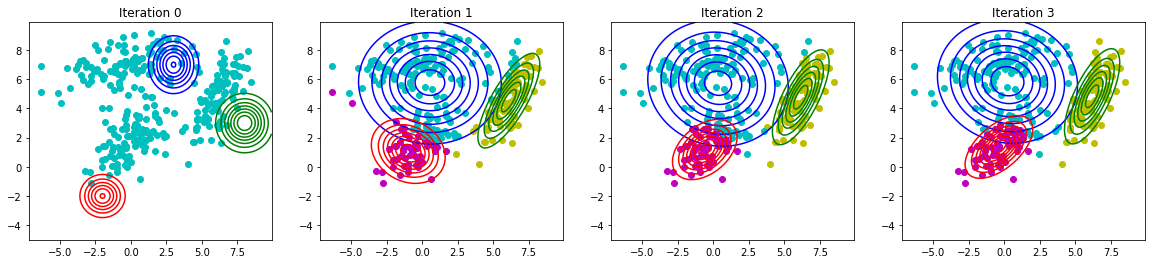

In [3]:
# -------------Generate Data
warnings.filterwarnings('ignore')
mu = [[0, 7],[0, 2],[6, 5]]
sigma = [[[6, 1],[1, 1]], [[1, 2], [2, 1]],[[1,1 ],[1 , 3]]]
data = []
for i in range(3):
  data.extend(np.random.multivariate_normal(mu[i], sigma[i], 100))
data = np.array(data)
N = len(data)

# ---------- Initialize Means, Covariances, pi
muk = [[3, 7],[-2, -2],[8, 3]]
covk = [[[ 0.8, 0],[0,  1]], [[0.7, 0],[0, 0.6]], [[1, 0],[0, 1]]]
pi = [.3, .2, .5]

# ---------- Implement EM
fig = plt.figure(figsize=[20,4])

for i in range(4):
  axs = plt.subplot(1, 4, i+1)
  axs.set_title("Iteration {}".format(i))

  if i >0:
    # EQ 9.23
    g_num = np.array([pi[i]*(multivariate_normal.pdf(data, muk[i], covk[i])) for i in range(3)])
    g = g_num/np.sum(g_num, axis=0)
    
    # EQ 9.27
    Nk = np.array([np.sum(g[i, :])for i in range(3)])

    # EQ 9.24
    muk = np.array([np.sum(data*np.atleast_2d(g[i, :]).T, axis=0)/Nk[i]for i in range(3)])

    # EQ 9.25
    covk = np.array([np.matmul(np.atleast_2d(g[i, :])*(data-muk[i]).T, (data-muk[i]))/Nk[i] for i in range(3)])
     
    # EQ 9.26
    pi = np.array([np.sum(np.atleast_2d(g[i, :]))for i in range(3)])/N

  for k in range(3):
    x, y = np.mgrid[-5:10:.1, -5:10:.1]
    pos = np.dstack((x, y))
    rv = multivariate_normal(muk[k], covk[k])
    axs.contour(x, y, rv.pdf(pos), colors=['b', 'r', 'g'][k])

  for j in range(0, len(data)):
    axs.scatter(data[j,0], data[j,1], color=['c', 'm', 'y'][np.argmax(g[:, j])])

plt.show()